In [2]:
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
dataset_zip = zipfile.ZipFile('dataset_roti.zip','r')
dataset_zip.extractall()

In [55]:
# Definisi parameter
train_dir = 'dataset_roti/train'
validation_dir = 'dataset_roti/validation'
batch_size = 32
epochs = 10
img_height = 150
img_width = 150

In [56]:
# Load MobileNetV2 pre-trained model (without top classification layer)
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze base model layers
base_model.trainable = False

In [57]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=outputs)

In [58]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

In [59]:
# Pembuatan objek ImageDataGenerator untuk augmentasi data dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [61]:
# Persiapan data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 666 images belonging to 2 classes.
Found 322 images belonging to 2 classes.


In [62]:
# Fit model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)


Epoch 1/10
20/20 [==============================] - 13s 457ms/step - loss: 0.4827 - accuracy: 0.8060 - val_loss: 0.1307 - val_accuracy: 0.9500
Epoch 2/10
20/20 [==============================] - 8s 426ms/step - loss: 0.1728 - accuracy: 0.9125 - val_loss: 0.1358 - val_accuracy: 0.9594
Epoch 3/10
20/20 [==============================] - 7s 357ms/step - loss: 0.1109 - accuracy: 0.9606 - val_loss: 0.0854 - val_accuracy: 0.9688
Epoch 4/10
20/20 [==============================] - 9s 445ms/step - loss: 0.0837 - accuracy: 0.9637 - val_loss: 0.0446 - val_accuracy: 0.9875
Epoch 5/10
20/20 [==============================] - 8s 410ms/step - loss: 0.0798 - accuracy: 0.9685 - val_loss: 0.0469 - val_accuracy: 0.9906
Epoch 6/10
20/20 [==============================] - 8s 409ms/step - loss: 0.0476 - accuracy: 0.9858 - val_loss: 0.0276 - val_accuracy: 0.9969
Epoch 7/10
20/20 [==============================] - 8s 420ms/step - loss: 0.0575 - accuracy: 0.9779 - val_loss: 0.0213 - val_accuracy: 0.9969
Epoch

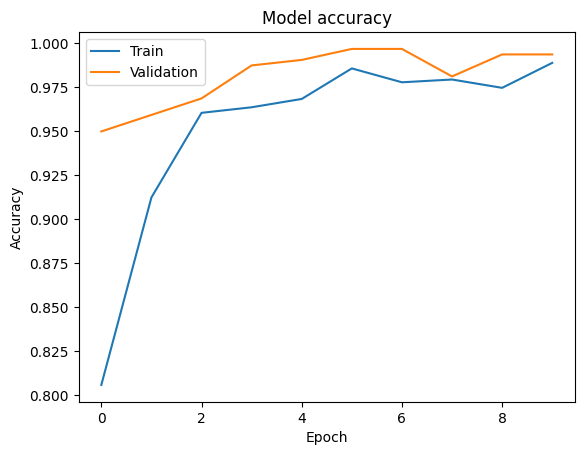

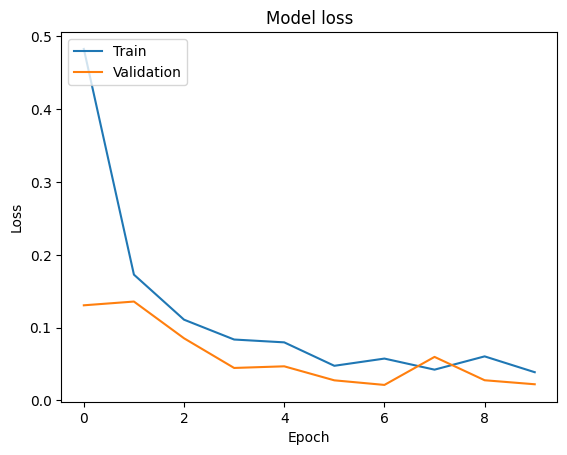

In [63]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#test
from google.colab import files

image_data = files.upload()
image_file = list(image_data.keys())[0]
image = tf.keras.utils.load_img(image_file, target_size=(150, 150))
image_array = tf.keras.utils.img_to_array(image)
image_array = image_array / 255.
image_array = np.array([image_array])
result_predict = model.predict(image_array)[0][0]
print(result_predict)
if(result_predict > 0.5):
  print(f'Roti Tidak Berjamur, Kemiripan: {int(result_predict * 100)}%')
else:
  print(f'Roti Berjamur, Kemiripan: {100 - int(result_predict * 100)}%')
plt.imshow(image)
plt.show()

In [66]:
model.save('mo-Rotie_Classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
